In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
# fft 2d
def FFT(entrada):
    FFT = np.fft.fftshift(np.fft.fft2(entrada))
    return FFT

# ifft 2d
def IFFT(entrada):
    IFFT = np.fft.ifft2(entrada)
    return IFFT

In [3]:
# factores multiplicativos de unidades métricas
m = 1.
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

In [4]:
def graph(entrada, mode):
    if mode == "i":
        plt.figure()
        plt.imshow(np.abs(entrada)**2)
        plt.show()
    elif mode == "f":
        plt.figure()
        plt.imshow(np.angle(entrada))
        plt.show()
    elif mode == "real":
        plt.figure()
        plt.imshow(np.real(entrada))
        plt.show()
    elif mode == "imag":
        plt.figure()
        plt.imshow(np.imag(entrada))
        plt.show()

In [5]:
def ang_spec(entrada, del_x, del_y, wave_length, z):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    
    # Dimensiones longitudinales de la imagen
    Lx = del_x*N
    Ly = del_y*M
    # Tamaño muestral en las frecuencias
    del_fx = 1/Lx
    del_fy = 1/Ly
        
    if N%2==0:
        x = np.arange(-int(N/2),int(N/2),1)
    else:
        x = np.arange(-int(N/2),int(N/2)+1,1)

    if M%2==0:
        y = np.arange(-int(M/2),int(M/2),1)
    else:
        y = np.arange(-int(M/2),int(M/2)+1,1)
        
        
    p, q = np.meshgrid(x,y)
    fx = p*del_fx
    fy = q*del_fy
        
    # espectro angular en el plano de entrada
    A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
    ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
    ker = ker
    A_z = A_0*ker
    U_z = np.fft.ifft2(A_z)

    print(f'Longitud x de la imagen: {round(del_x*np.shape(entrada)[1]*100, 2)} cm \nLongitud y de la imagen: {round(del_y*np.shape(entrada)[0]*100, 2)} cm ')
    print(f'Máxima distancia de propagación aceptable: {round(dist, 4)} metros o {round(dist*100, 2)} centímetros')

    return U_z

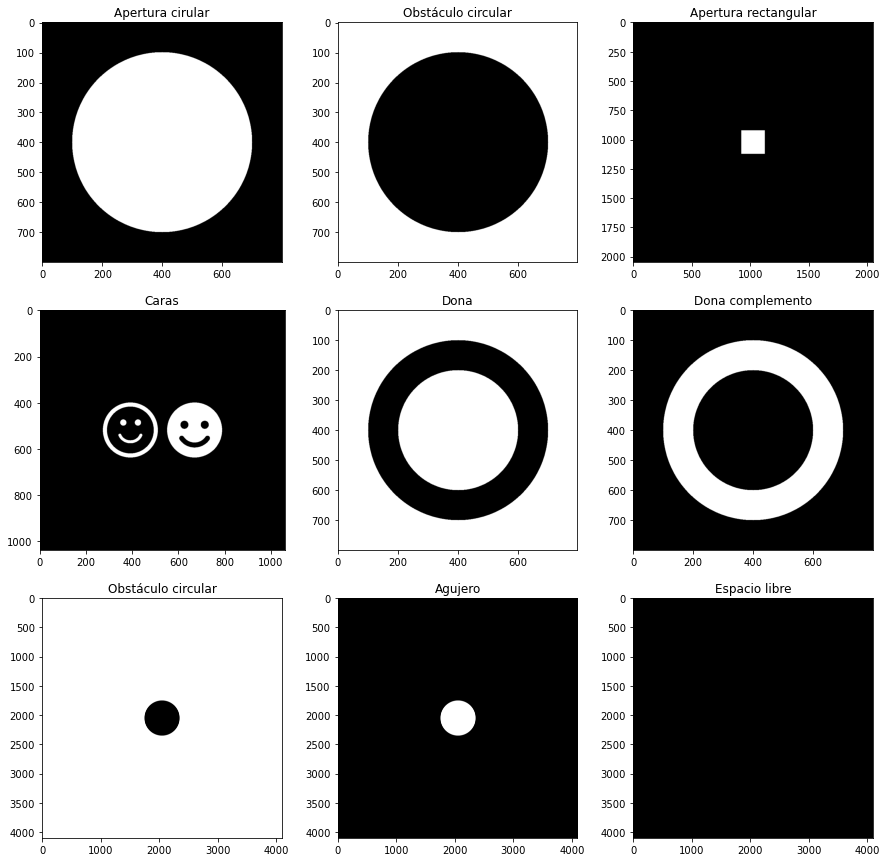

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Apertura circular
mask1 = np.zeros((800,800),dtype="uint8")

cv2.circle(mask1,(400,400),300,1,-1)
ax[0,0].set_title("Apertura cirular")
ax[0,0].imshow(mask1,cmap='gray')

# Obstáculo circular
mask2 = np.ones((800,800),dtype="uint8")

cv2.circle(mask2,(400,400),300,0,-1)
ax[0,1].set_title("Obstáculo circular")
ax[0,1].imshow(mask2,cmap='gray')

# Apertura rectangular
mask3 = np.zeros((2048,2048), dtype='uint8')

rect = cv2.rectangle(mask3,(924,924),(1124,1124),1,-1)

ax[0,2].set_title("Apertura rectangular")
ax[0,2].imshow(mask3,cmap='gray')

# Caras
cara = cv2.imread('cara.jpg', 0)

for i in range(256):
    if i < 50:
        cara[cara == i] = 1
    else:
        cara[cara == i] = 0


cara2 = np.pad(cara, ((213,213),(224,224)), mode='constant', constant_values=0)
ax[1,0].set_title("Caras")
ax[1,0].imshow(cara2,cmap='gray')

# Dona
w_0 = 0
w_i = 0
donut = np.ones((800,800),dtype="uint8")

cv2.circle(donut,(400,400),300,0,-1)
cv2.circle(donut,(400,400),200,1,-1)
ax[1,1].set_title("Dona")
ax[1,1].imshow(donut,cmap='gray')

# Dona complemento
donut2 = np.zeros((800,800),dtype="uint8")

cv2.circle(donut2,(400,400),300,1,-1)
cv2.circle(donut2,(400,400),200,0,-1)
ax[1,2].set_title("Dona complemento")
ax[1,2].imshow(donut2,cmap='gray')

# Obstáculo circular
obst = np.ones((4096,4096), dtype='uint8')

coor1 = int(np.shape(obst)[0]/2)

cv2.circle(obst, (coor1,coor1),300,0,-1)

ax[2,0].set_title("Obstáculo circular")
ax[2,0].imshow(obst,cmap='gray')

# Obstáculo circular complemento
hole = np.zeros((4096,4096), dtype='uint8')

coor = int(np.shape(obst)[0]/2)

cv2.circle(hole, (coor,coor),300,1,-1)

ax[2,1].set_title("Agujero")
ax[2,1].imshow(hole,cmap='gray')

# Espacio libre
free = np.ones((4096,4096), dtype='uint8')
ax[2,2].set_title("Espacio libre")
ax[2,2].imshow(free,cmap='gray')

plt.show()

Longitud x de la imagen: 2.12 cm 
Longitud y de la imagen: 2.08 cm 
Máxima distancia de propagación aceptable: 0.6559 metros o 65.59 centímetros


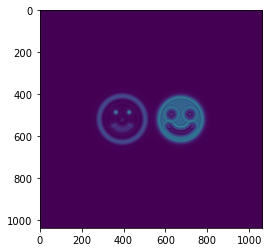

In [7]:
entrada = cara2
del_x = 20*um
del_y = 20*um
wave_length = 633*nm
z = 25*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 0.4 cm 
Longitud y de la imagen: 0.4 cm 
Máxima distancia de propagación aceptable: 0.0316 metros o 3.16 centímetros


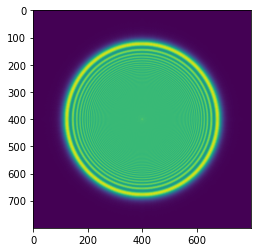

In [8]:
entrada = mask1
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 3*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 0.4 cm 
Longitud y de la imagen: 0.4 cm 
Máxima distancia de propagación aceptable: 0.0316 metros o 3.16 centímetros


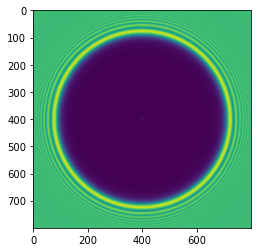

In [9]:
entrada = mask2
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 3*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 0.8 cm 
Longitud y de la imagen: 0.8 cm 
Máxima distancia de propagación aceptable: 0.1264 metros o 12.64 centímetros


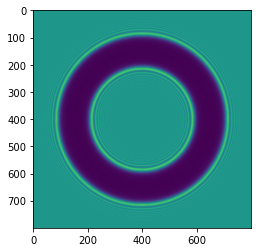

In [10]:
entrada = donut
del_x = 10*um
del_y = 10*um
wave_length = 633*nm
z = 5*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 0.8 cm 
Longitud y de la imagen: 0.8 cm 
Máxima distancia de propagación aceptable: 0.1264 metros o 12.64 centímetros


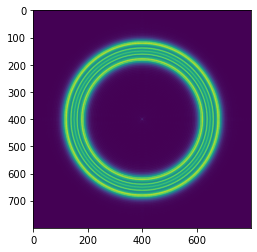

In [11]:
entrada = donut2
del_x = 10*um
del_y = 10*um
wave_length = 633*nm
z = 9*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 0.8 cm 
Longitud y de la imagen: 0.8 cm 
Máxima distancia de propagación aceptable: 0.1264 metros o 12.64 centímetros
Longitud x de la imagen: 0.8 cm 
Longitud y de la imagen: 0.8 cm 
Máxima distancia de propagación aceptable: 0.1264 metros o 12.64 centímetros


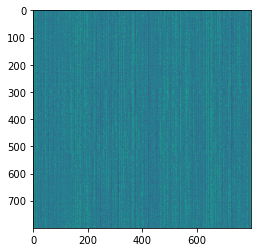

In [12]:
del_x = 10*um
del_y = 10*um
wave_length = 633*nm
z = 9*cm
mode = 'M'

a = np.abs(ang_spec(donut, del_x, del_y, wave_length, z) + ang_spec(donut2, del_x, del_y, wave_length, z))**2
plt.figure()
plt.imshow(a)
plt.show()

Longitud x de la imagen: 1.02 cm 
Longitud y de la imagen: 1.02 cm 
Máxima distancia de propagación aceptable: 0.0809 metros o 8.09 centímetros


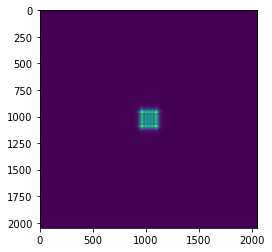

In [13]:
entrada = mask3
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 7*cm
mode = 'i'

graph(ang_spec(entrada, del_x, del_y, wave_length, z), mode)

Longitud x de la imagen: 2.05 cm 
Longitud y de la imagen: 2.05 cm 
Máxima distancia de propagación aceptable: 0.1618 metros o 16.18 centímetros


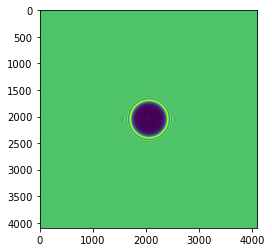

Longitud x de la imagen: 2.05 cm 
Longitud y de la imagen: 2.05 cm 
Máxima distancia de propagación aceptable: 0.1618 metros o 16.18 centímetros


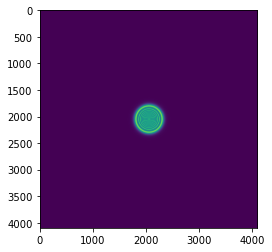

Longitud x de la imagen: 2.05 cm 
Longitud y de la imagen: 2.05 cm 
Máxima distancia de propagación aceptable: 0.1618 metros o 16.18 centímetros
Longitud x de la imagen: 2.05 cm 
Longitud y de la imagen: 2.05 cm 
Máxima distancia de propagación aceptable: 0.1618 metros o 16.18 centímetros


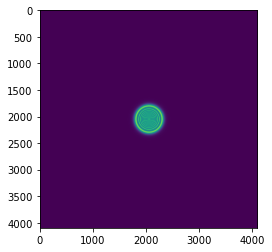

In [14]:
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 16*cm
mode = 'M'

graph(ang_spec(obst, del_x, del_y, wave_length, z), 'i')
graph(ang_spec(hole, del_x, del_y, wave_length, z), 'i')
#ang_spec(free, del_x, del_y, wave_length, z)

plt.figure()
plt.imshow(np.abs(ang_spec(free, del_x, del_y, wave_length, z)-ang_spec(obst, del_x, del_y, wave_length, z))**2)
plt.show()